# Prediction on Titanic Dataset

### Here, we'll try to predict a classification of survival or deceased on the Titanic Dataset with Logistic Regression Model

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print("Import complete")

Import complete


## Start the project by reading the data into a pandas data frame

In [101]:
df = pd.read_csv("titanic.csv")

In [102]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [104]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## Exploratory Data Analysis

### Let's begin the exploratory data analysis with finding the missing data

<AxesSubplot:>

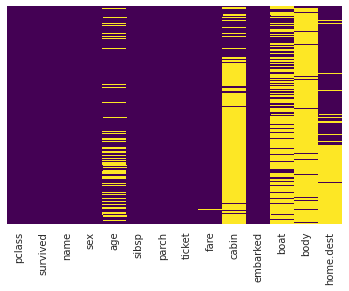

In [105]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='survived', ylabel='count'>

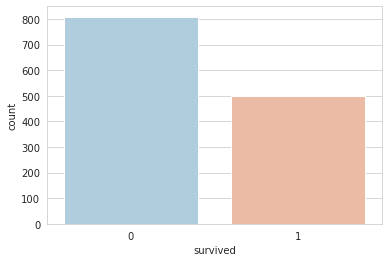

In [106]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='survived', ylabel='count'>

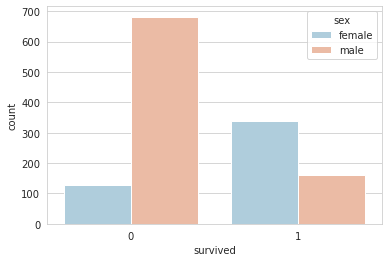

In [107]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=df,palette='RdBu_r')

/media/rahul/NewVolume/HardDriveFiles/Anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='age'>

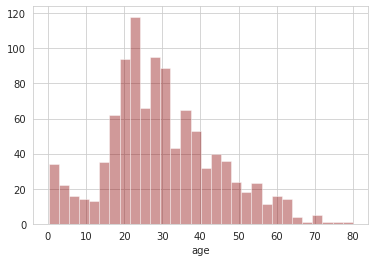

In [108]:
sns.distplot(df['age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:>

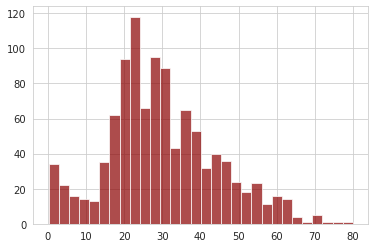

In [109]:
df['age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

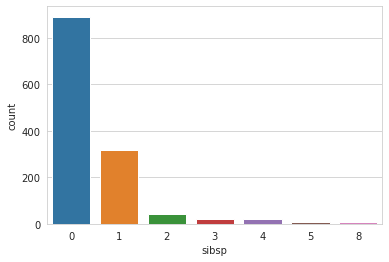

In [110]:
sns.countplot(x='sibsp',data=df)

<AxesSubplot:>

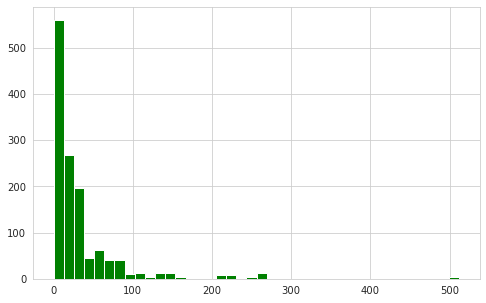

In [111]:
df['fare'].hist(color='green',bins=40,figsize=(8,5))

## Cufflinks for plots

In [112]:
import cufflinks as cf
cf.go_offline()

In [113]:
df['fare'].iplot(kind='hist',bins=30,color='red')

## Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='pclass', ylabel='age'>

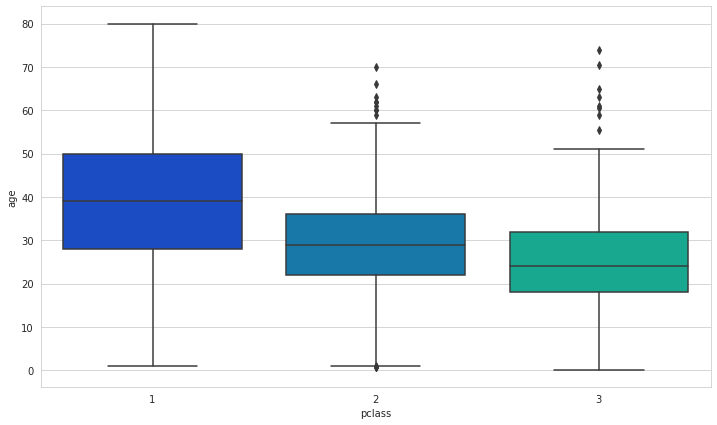

In [114]:
plt.figure(figsize=(12,7))
sns.boxplot(x='pclass',y='age', data=df, palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [115]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):

        if pclass == 1:
            return 37

        elif pclass == 2:
            return 29

        else:
            return 24

    else:
        return age

In [116]:
df['age'] = df[['age','pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

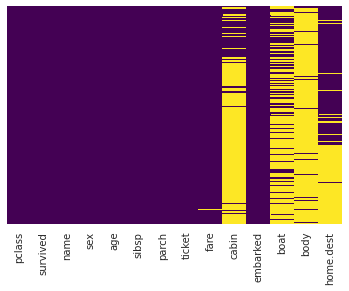

In [117]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Great! Now let's drop the columns cabin, boat, body,home.dest

In [119]:
df.drop(['cabin','boat','body'],axis=1,inplace=True)

In [120]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [121]:
df.drop('home.dest',axis=1,inplace=True)

<AxesSubplot:>

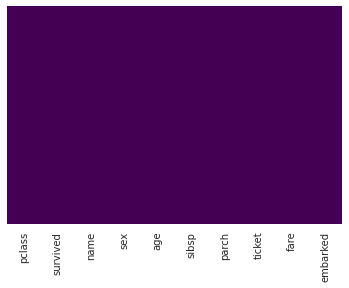

In [122]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [123]:
df.dropna(inplace=True)

## Converting categorical fetures

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   int64  
 1   survived  1306 non-null   int64  
 2   name      1306 non-null   object 
 3   sex       1306 non-null   object 
 4   age       1306 non-null   float64
 5   sibsp     1306 non-null   int64  
 6   parch     1306 non-null   int64  
 7   ticket    1306 non-null   object 
 8   fare      1306 non-null   float64
 9   embarked  1306 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.2+ KB


sex = pd.get_dummies(df['sex'],drop_first=True)
embark = pd.get_dummies(df['embarked'],drop_first=True)

In [125]:
df.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

In [126]:
df = pd.concat([df,sex,embark],axis=1)

In [135]:
df

,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,1,1,29.00,0,0,211.3375,0,0,1
1,1,1,0.92,1,2,151.5500,1,0,1
2,1,0,2.00,1,2,151.5500,0,0,1
3,1,0,30.00,1,2,151.5500,1,0,1
4,1,0,25.00,1,2,151.5500,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3,0,14.50,1,0,14.4542,0,0,0
1305,3,0,24.00,1,0,14.4542,0,0,0
1306,3,0,26.50,0,0,7.2250,1,0,0
1307,3,0,27.00,0,0,7.2250,1,0,0


In [149]:
df.shape

(1306, 9)

# Building Logistic Regression Model

In [128]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_test, y_train = train_test_split(df.drop('survived',axis=1),df['survived'],test_size =0.5)

# Training and Predicting

In [137]:
from sklearn.linear_model import LogisticRegression

In [144]:
lr = LogisticRegression(max_iter=10000)


In [145]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [146]:
prediction = lr.predict(X_test)

In [150]:
import warnings
warnings.filterwarnings('ignore')

## Evaluation

In [151]:
from sklearn.metrics import classification_report

In [152]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       397
           1       0.00      0.00      0.00       256

    accuracy                           0.61       653
   macro avg       0.30      0.50      0.38       653
weighted avg       0.37      0.61      0.46       653

